*   **Año:** [2024]
*   **Alumno/a:** [Gianni Mana]
*   **Legajo:** [45155554]

# Archivos de texto plano

[gutenberg.org](https://www.gutenberg.org/) (llamado así por el inventor de la imprenta moderna) es el sitio web del Proyecto Gutenberg que se dedica a la distribución y creación de eBooks. En este sitio se encuentra el [Don Quijote](https://www.gutenberg.org/ebooks/14859). El Don Quijote se puede leer en diferentes formatos, ¿no? Para la tarea, se va a usar el Don Quijote de texto plano. La siguiente celda descarga el .txt y lo guarda en el sistema para luego su futura lectura:




In [21]:
!wget https://www.gutenberg.org/cache/epub/2000/pg2000.txt

--2024-11-16 21:50:43--  https://www.gutenberg.org/cache/epub/2000/pg2000.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2225845 (2.1M) [text/plain]
Saving to: ‘pg2000.txt.1’

pg2000.txt.1        100%[===================>]   2.12M  4.83MB/s    in 0.4s    

2024-11-16 21:50:44 (4.83 MB/s) - ‘pg2000.txt.1’ saved [2225845/2225845]



## Consignas

***NOTA: Para estas consignas, no se puede usar modulos externos a Python***

Del archivo descargado, calcular la cantidad de lineas:

In [43]:
text = open('pg2000.txt', 'r')
lines = text.readlines()
print("La cantidad de líneas son: {}".format(len(lines)))

La cantidad de líneas son: 38055


Del archivo descargado, calcular la cantidad de veces que se dice:
*   'Quijote'
*   'mancha'
*   'españa'

Considerar que, por ejemplo, 'QuiJoTe' es lo mismo que 'quijote' (no *case sensitive*).

In [42]:
#Definimos variables para almacenar
quijote_count:int = 0
mancha_count:int = 0
españa_count:int = 0

#Calculamos convirtiendo todo a minuscula
for line in lines:
    line_lower = line.lower()
    quijote_count += line_lower.count('quijote')
    mancha_count += line_lower.count('mancha')
    españa_count += line_lower.count('españa')

#Imprimimos
print(f"La palabra 'Quijote' aparece {quijote_count} veces.")
print(f"La palabra 'mancha' aparece {mancha_count} veces.")
print(f"La palabra 'españa' aparece {españa_count} veces.")

La palabra 'Quijote' aparece 2249 veces.
La palabra 'mancha' aparece 196 veces.
La palabra 'españa' aparece 78 veces.


¿Quien es el autor y titulo del libro? Responderlo usando las herramientas utilizadas en la celda anterior (Tip: abrir el archivo de texto y ver como son las primeras lineas).

In [49]:
#Definimos variables para almacenar
autor:str = None
titulo:str = None

#Calculamos segun cantidad de lineas la palabra Author y title
for line in lines:
  if "Author:" in line:
    autor = line.split("Author:")[1].strip()
  if "Title:" in line:
    titulo = line.split("Title:")[1].strip()

#Mostramos el resultado
if autor and titulo:
    print(f"El autor es: {autor}, y el titulo es: {titulo}.")



El autor es: Miguel de Cervantes Saavedra, y el titulo es: Don Quijote.


# Archivos .csv

*Robert* De Niro actuó en mas de 100 peliculas y Rotten Tomatoes es un sitio web en el que se pueden leer criticas y ratings a peliculas hechos por críticos y usuarios. La siguiente linea descarga un archivo .csv en el que tenemos peliculas de De Niro junto a su rating en Rotten Tomatoes:

In [25]:
!wget https://people.sc.fsu.edu/~jburkardt/data/csv/deniro.csv

--2024-11-16 21:50:51--  https://people.sc.fsu.edu/~jburkardt/data/csv/deniro.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2391 (2.3K) [text/csv]
Saving to: ‘deniro.csv.1’

deniro.csv.1        100%[===================>]   2.33K  --.-KB/s    in 0s      

2024-11-16 21:50:52 (796 MB/s) - ‘deniro.csv.1’ saved [2391/2391]



## Consignas

***NOTA: Apartir de aca, se pueden usar modulos externos de Python***

Sabemos que el archivo tiene en su primera linea los 'headers'. ¿Cuales son? Imprimirlos.

In [63]:
text = open('deniro.csv', 'r')
headers = text.readline()

print("Headers:", headers)

Headers: "Year","Score","Title"



Convertir la información del archivo .csv a un diccionario.

In [ ]:
headers = lines[0].strip().split(',')

df:dict = []
for line in lines[1:]:
    values = line.strip().split(',')
    row_dict = dict(zip(headers, values))
    df.append(row_dict)


¿Cuantas peliculas hay registradas en el archivo .csv?

In [ ]:
total_movies:int = len(lines) - 1
print(f"El numero de peliculas registradas es de: {total_movies}.")

El numero de peliculas registradas es de: 38054.


Imprimir las peliculas mejor y peor rankeadas del archivo (imprimir sus respectivos rankings)

In [1]:
highest_rated_movies:list = []
lowest_rated_movies:list = []
max_score:int = None
min_score:int = None

for line in text:
  columns = line.strip().split(',')

  if len(columns) >= 3 and columns[1].strip().isdigit():
    year = columns[0].strip()
    score = int(columns[1].strip())
    title = columns[2].strip().strip('"')

    if max_score is None or score > max_score:
      max_score = score
      highest_rated_movies = [(year, score, title)]

    elif score == max_score:
      highest_rated_movies.append((year, score, title))

    if min_score is None or score < min_score:
      min_score = score
      lowest_rated_movies = [(year, score, title)]

    elif score == min_score:
      lowest_rated_movies.append((year, score, title))

if highest_rated_movies:
    print("Películas mejor rankeadas:", max_score, "):")
    for movie in highest_rated_movies:
        print(f"- {movie[2]} ({movie[0]})")

if lowest_rated_movies:
    print("Películas peor rankeadas:", min_score, "):")
    for movie in lowest_rated_movies:
        print(f"- {movie[2]} ({movie[0]})")


NameError: name 'text' is not defined

# Base de datos - Relacionales

SQLite es una biblioteca de C que provee una base de datos ligera basada en disco que no requiere un proceso de servidor separado y permite acceder a la base de datos usando una variación no estándar del lenguaje de consulta SQL. Algunas aplicaciones pueden usar SQLite para almacenamiento interno. También es posible prototipar una aplicación usando SQLite y luego transferir el código a una base de datos más grande como PostgreSQL u Oracle.

Realizamos el `import` e indicamos el archivo en el que vamos a guardar la base de datos:

In [71]:
import sqlite3
conn = sqlite3.connect('db.db')

La siguiente linea de codigo agrega filas a la misma. Por favor, ejecutar la siguiente celda para la consigna:



In [72]:
!wget https://people.sc.fsu.edu/~jburkardt/data/csv/snakes_count_10000.csv

cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS t;")
cur.execute("CREATE TABLE t (GameNumber, GameLength);")

with open('snakes_count_10000.csv','r') as csv_file:
  lines = csv_file.readlines()[1:]
  lines = [l.split(',') for l in lines]
  to_db = [(l[0].strip(), l[1].strip()) for l in lines]

cur.executemany("INSERT INTO t (GameNumber, GameLength) VALUES (?, ?);", to_db)
conn.commit()


--2024-11-16 22:17:23--  https://people.sc.fsu.edu/~jburkardt/data/csv/snakes_count_10000.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89011 (87K) [text/csv]
Saving to: ‘snakes_count_10000.csv’

snakes_count_10000. 100%[===================>]  86.92K   414KB/s    in 0.2s    

2024-11-16 22:17:24 (414 KB/s) - ‘snakes_count_10000.csv’ saved [89011/89011]



## Consignas

¿Como luce la base de datos? Imprimirla.


In [73]:
cur.execute("SELECT * FROM t;")
rows = cur.fetchall()
for row in rows:
    print(row)

Se han truncado las últimas 5000 líneas del flujo de salida.
('5001', '35')
('5002', '52')
('5003', '57')
('5004', '17')
('5005', '21')
('5006', '22')
('5007', '21')
('5008', '13')
('5009', '24')
('5010', '51')
('5011', '21')
('5012', '42')
('5013', '37')
('5014', '13')
('5015', '25')
('5016', '41')
('5017', '13')
('5018', '48')
('5019', '31')
('5020', '15')
('5021', '23')
('5022', '62')
('5023', '47')
('5024', '25')
('5025', '19')
('5026', '16')
('5027', '52')
('5028', '42')
('5029', '29')
('5030', '17')
('5031', '29')
('5032', '61')
('5033', '17')
('5034', '24')
('5035', '30')
('5036', '67')
('5037', '18')
('5038', '30')
('5039', '17')
('5040', '19')
('5041', '46')
('5042', '26')
('5043', '16')
('5044', '50')
('5045', '25')
('5046', '75')
('5047', '22')
('5048', '25')
('5049', '60')
('5050', '16')
('5051', '59')
('5052', '51')
('5053', '22')
('5054', '13')
('5055', '23')
('5056', '30')
('5057', '141')
('5058', '151')
('5059', '12')
('5060', '39')
('5061', '85')
('5062', '22')
('5063'

¿Cuantas filas hay en la base de datos?

In [77]:
cur.execute("SELECT COUNT(*) FROM t;")
filas:int = cur.fetchone()[0]
print(f"Número de filas en la base de datos: {filas}")

Número de filas en la base de datos: 10000


¿Cual es el máximo `GameLength` y en qué `GameNumber` se realizó?

In [78]:
cur.execute("SELECT MAX(GameLength), GameNumber FROM t;")
max_game_length_row = cur.fetchone()
print(f"El máximo GameLength es {max_game_length_row[0]} y se realizó en el GameNumber {max_game_length_row[1]}.")

El máximo GameLength es 99 y se realizó en el GameNumber 363.


# API Requests
Por lo general, conseguimos datos a traves de internet. Aunque el concepto de Application Programming Interface (API) es muy amplio y muy poco concreto, en el contexto de los servidores, es un conjunto de 'endpoints' que los servidores ofrecen para poder leer/procesar/escribir información en estos mismos.

[En este repositorio](https://github.com/public-apis/public-apis) van a encontrar una lista de APIs públicas (pueden elegir otras que no son de ese repositorio). Para la consigna, se recomienda usar aquellas APIs que no requieren autenticación. Si se elige una API con autenticación, por favor, adjuntar las keys o pasarl las credenciales necesarias para su futura ejecución También, pueden usar varias URLs.

## Consigna

Hacer una request GET e imprimir uno de los campos de la respuesta:

In [79]:
import requests

url = "https://jsonplaceholder.typicode.com/posts/1"

response = requests.get(url)

if response.status_code == 200:
    content_data = response.json()
    print(content_data['title'])


sunt aut facere repellat provident occaecati excepturi optio reprehenderit


Hacer una request GET y, apartir de los campos en la respuesta, generar otro campo (por ejemplo, si la respuesta solo incluye un timestamp y una posición del registro, elaborar la velocidad del registro)

In [80]:
url = "https://jsonplaceholder.typicode.com/todos/1"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    if data['completed']:
      status = "Done"
    else:
      status = "Pending"

    print("Original Data:", data)
    data['status'] = status
    print("Data with new field:",data)

Original Data: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Data with new field: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False, 'status': 'Pending'}


# Streaming data
Ahora vamos a hacer algo muy parecido a lo anterior, pero vamos a usar APIs que nos ofrecen datos en tiempo real. Pueden encontrar APIs de este estilo [en este repositorio](https://github.com/ColinEberhardt/awesome-public-streaming-datasets) (pueden elegir otras que no son de ese repositorio)

## Consigna

Hacer un plot con `matplotlib` de una variable de una API de datos streaming en el que el eje 'y' sea la variable y el eje 'x' el tiempo.

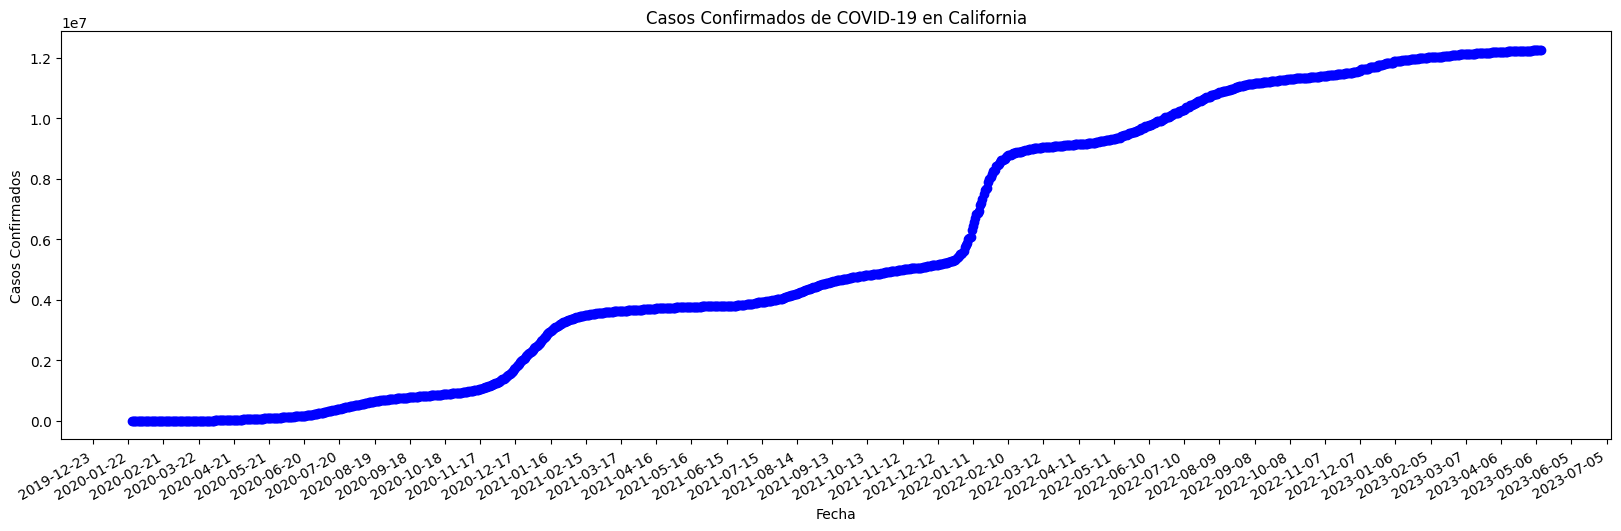

In [81]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

url = "https://api.covidactnow.org/v2/state/CA.timeseries.json?apiKey=fb6ea75e99ff48a8ba8654eb0952a2fe"

response = requests.get(url)
data = response.json()

dates = []
confirmed_cases = []

for entry in data['actualsTimeseries']:
    dates.append(datetime.strptime(entry['date'], '%Y-%m-%d'))
    confirmed_cases.append(entry['cases'])

plt.figure(figsize=(20,6))
plt.plot(dates, confirmed_cases, marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.title('Casos Confirmados de COVID-19 en California')

plt.show()